# 02 — EDA & Two-way ANOVA
- visuals for distributions and group differences
- ANOVA for Session_Type, Time_of_Day, and interaction

# 🚴 Cycling Effectiveness Analysis

This project explores the question:

“Which is more effective: indoor cycling in the mornings or afternoons versus outdoor cycling in the mornings or afternoons?”

I use a cycling activity dataset (from Kaggle) containing detailed session logs, including date/time, activity type (indoor vs outdoor), duration, distance, calories burned, heart rate, speed, cadence, power, and training stress score.

The goal is to define and measure effectiveness of a cycling session, compare performance across different conditions (indoor/outdoor × morning/afternoon), and build models that can predict workout effectiveness based on session features.



### Objectives
1. Data Cleaning & Preparation
 - Parse timestamps into separate date and time columns.
 - Engineer categorical features for Session Type (Indoor vs Outdoor) and Time of Day (Morning vs Afternoon).
 - Handle missing values (--) and normalize numeric columns.
 
2. Exploratory Data Analysis (EDA)
 - Summarize metrics (calories per minute, average HR, speed) across categories.•Visualize distributions with boxplots/violin plots.
 - Test for statistical significance (two-way ANOVA).
 
3. Effectiveness Definition
 - Primary: Calories per minute (caloric efficiency).
 - Alternative: Power per minute or Training Stress Score per minute.
 
4. Machine Learning Modeling
 - Regression (TensorFlow): Predict calories per minute from ride metrics.
 - Classification (TensorFlow): Predict whether a ride will be “high effectiveness” vs “low effectiveness.”
 
5. Insights & Conclusions
 - Identify which combination (indoor/outdoor × morning/afternoon) yields the most effective workouts.
 - Evaluate whether time of day or ride type is a stronger predictor of effectiveness.
 - Provide evidence-based recommendations for training optimization.


Tools & Libraries
 - Data Wrangling: pandas, numpy
 - Visualization: matplotlib, seaborn
 - Statistics: scipy, statsmodels (ANOVA)
 - Machine Learning: scikit-learn (utilities), TensorFlow/Keras (models)
 - Notebook Environment: JupyterLab

✨ Expected Outcome:
This project delivers both descriptive insights (e.g., “Outdoor morning rides burn more calories per minute than indoor afternoons”) and predictive models that help forecast session effectiveness under different conditions.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score, classification_report
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df = pd.read_csv("/Users/amlim/cycling-effectiveness/data/cleaned_cycling.csv")


## Visualization

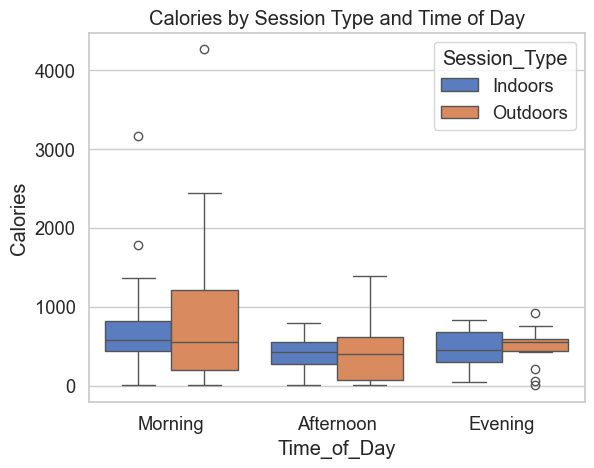

In [2]:
df = df.rename(columns={
    "Training Stress Score": "Training_Stress_Score",
    "Session Type": "Session_Type",
    "Time of Day": "Time_of_Day"
})
# focusing on columns: Session Type, Time of Day, Calories, Distance, Training Stress Score
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

sns.boxplot(data=df, x="Time_of_Day", y="Calories", hue="Session_Type")
plt.title("Calories by Session Type and Time of Day")
plt.show()

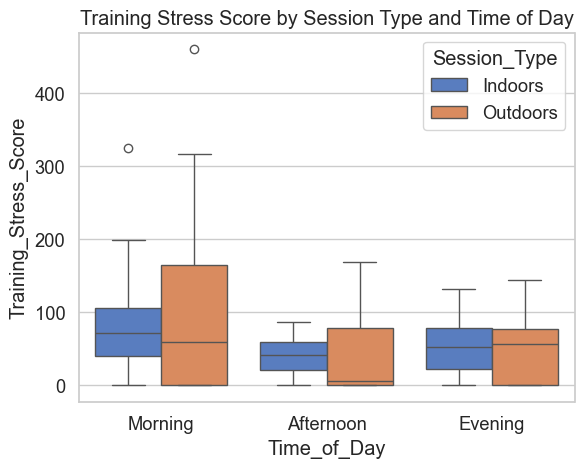

In [3]:
sns.boxplot(data=df, x="Time_of_Day", y="Training_Stress_Score", hue="Session_Type")
plt.title("Training Stress Score by Session Type and Time of Day")
plt.show()

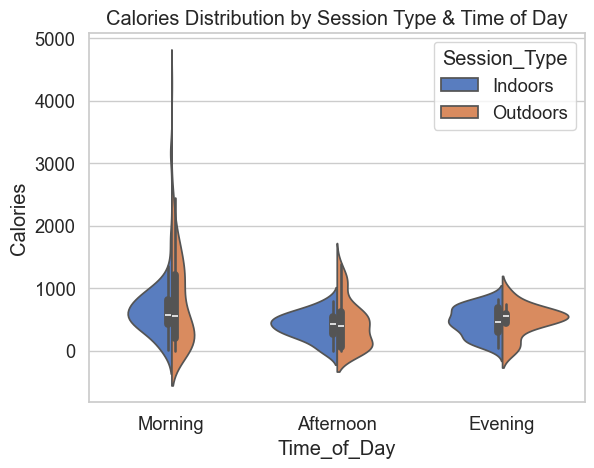

In [4]:
sns.violinplot(data=df, x="Time_of_Day", y="Calories", hue="Session_Type", split=True)
plt.title("Calories Distribution by Session Type & Time of Day")
plt.show()

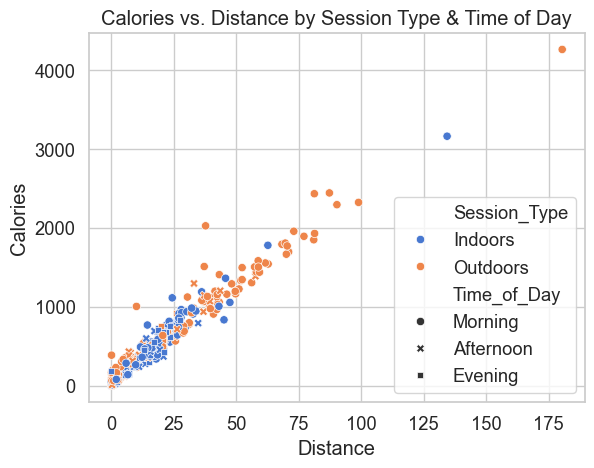

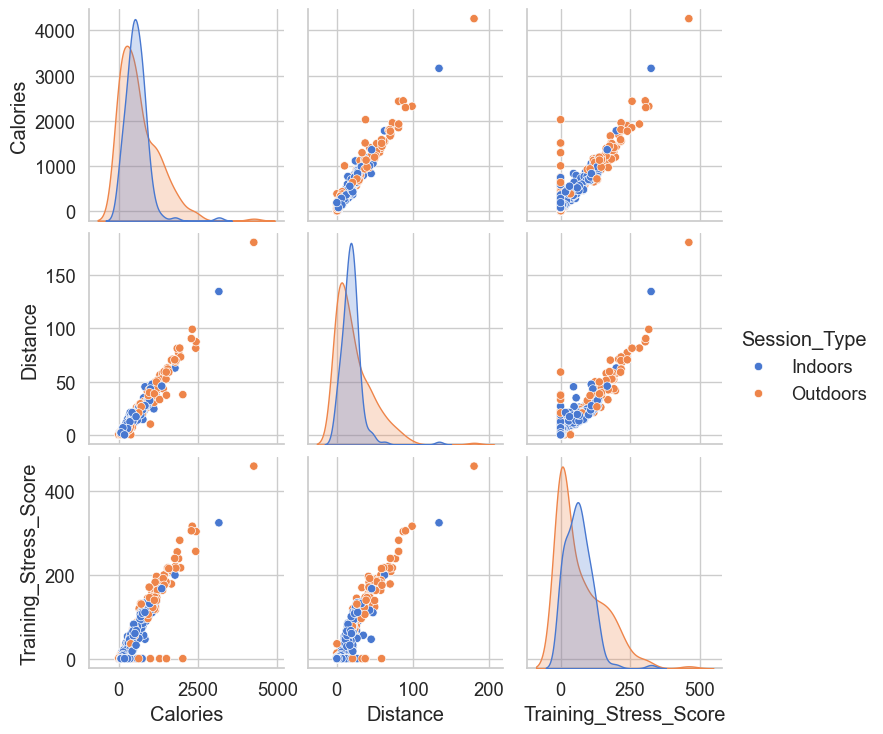

In [5]:
sns.scatterplot(data=df, x="Distance", y="Calories", hue="Session_Type", style="Time_of_Day")
plt.title("Calories vs. Distance by Session Type & Time of Day")
plt.show()

sns.pairplot(df, vars=["Calories", "Distance", "Training_Stress_Score"], hue="Session_Type")
plt.show()

In [6]:
df.groupby(["Session_Type","Time_of_Day"])[["Calories","Training_Stress_Score"]].mean()

Calories  Training_Stress_Score
Session_Type Time_of_Day                                   
Indoors      Afternoon    404.761905              43.023810
             Evening      467.200000              54.644681
             Morning      654.357143              74.514085
Outdoors     Afternoon    430.516667              40.912903
             Evening      487.266667              48.200000
             Morning      786.426230              87.572581

In [7]:

model_cal = smf.ols("Calories ~ C(Session_Type) * C(Time_of_Day)", data=df).fit()
anova_cal = sm.stats.anova_lm(model_cal, typ=2)
print("ANOVA for Calories\n", anova_cal)



ANOVA for Calories
                                       sum_sq     df          F    PR(>F)
C(Session_Type)                 5.928217e+05    1.0   2.158528  0.142742
C(Time_of_Day)                  6.866776e+06    2.0  12.501336  0.000006
C(Session_Type):C(Time_of_Day)  1.978429e+05    2.0   0.360184  0.697825
Residual                        8.980784e+07  327.0        NaN       NaN


Session Type is not significant (p=0.14). Calories burned doesn't differ much just by being indoors or outdoors.

Time of Day is high significant (p<0.001). Calories burned does vary across Morning, Afternoon, Evening.

Interaction is not significant. Session Type and Time of Day don't combine in a meaningful way.

In [8]:
model_tss = smf.ols("Training_Stress_Score ~ C(Session_Type) * C(Time_of_Day)", data=df).fit()
anova_tss = sm.stats.anova_lm(model_tss, typ=2)
print("ANOVA for TSS\n", anova_tss)

ANOVA for TSS
                                       sum_sq     df          F    PR(>F)
C(Session_Type)                 3.233255e+03    1.0   0.666049  0.415014
C(Time_of_Day)                  1.139290e+05    2.0  11.734662  0.000012
C(Session_Type):C(Time_of_Day)  5.007879e+03    2.0   0.515810  0.597491
Residual                        1.621363e+06  334.0        NaN       NaN


Session Type not significant. TSS doesn't differ by indoor vs. outdoor.

Time of Day is highly significant.

Interaction is not significant.